In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns




Original DataFrame head:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  prol

C:\Users\basde\AppData\Local\Temp\ipykernel_22304\1865846613.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='base_n_0', data=comparison_df, palette='viridis')
C:\Users\basde\AppData\Local\Temp\ipykernel_22304\1865846613.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='base_n_1', data=comparison_df, palette='viridis')
C:\Users\basde\AppData\Local\Temp\ipykernel_22304\1865846613.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[2], x='base_n_2', data=comparison_df, palette='viridis')


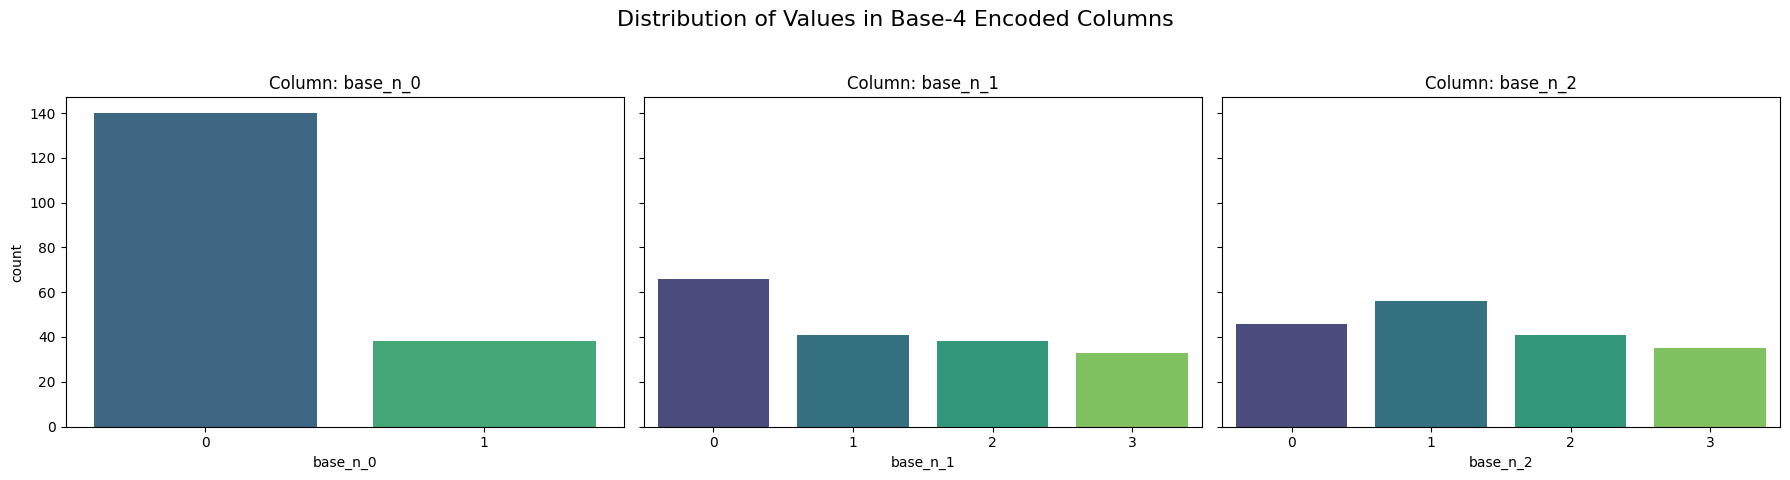

In [2]:
# --- When to Use Base-N Encoding ---
# Base-N encoding is a powerful technique for converting categorical features into a numerical format.
# It's particularly useful for:
# 1. High Cardinality Features: When a categorical feature has a large number of unique values (e.g., zip codes, user IDs),
#    one-hot encoding would create too many new columns, potentially leading to performance issues. Base-N creates a much smaller number of columns.
# 2. Preserving Information: It can capture more information about the uniqueness of categories than simple label encoding,
#    without creating the sparsity of one-hot encoding.
#
# --- Requirements ---
# - The data must be categorical.
# - The 'category_encoders' library is required.
# - It's important to fit the encoder on the training data and then use it to transform both the training and testing data to avoid data leakage.

# 1. Load a Sample Dataset
# We'll use the wine dataset from scikit-learn, which is typically used for classification.
# For this demonstration, we'll treat the 'target' column (representing wine cultivars) as our categorical feature.
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['cultivar'] = wine_data.target

# Let's also create a higher cardinality feature for a more illustrative example
# as the 'cultivar' column only has 3 unique values.
np.random.seed(42)
high_cardinality_values = [f'Category_{i}' for i in range(20)]
df['high_cardinality_feature'] = np.random.choice(high_cardinality_values, size=len(df))


print("Original DataFrame head:")
print(df.head())
print("\nNumber of unique values in 'high_cardinality_feature':", df['high_cardinality_feature'].nunique())


# 2. Select the Feature to Encode
# We will apply Base-N encoding to the 'high_cardinality_feature'.
# We choose N=4 for our Base-N encoding. This means we will represent the categories in base 4.
# The number of required digits (columns) will be ceil(log_N(number of categories)).
# For 20 categories and base 4, we need log4(20) ≈ 2.16, so we'll get 3 columns.
BASE_N = 4

# 3. Apply Base-N Encoding
# Initialize the BaseNEncoder. `drop_last=False` keeps all encoded columns.
encoder = ce.BaseNEncoder(cols=['high_cardinality_feature'], base=BASE_N, return_df=True)

# Fit and transform the data
df_encoded = encoder.fit_transform(df)

print(f"\nDataFrame head after Base-{BASE_N} Encoding:")
print(df_encoded.head())


# 4. Show the Result
# The encoder replaces the original column with new columns named 'high_cardinality_feature_0', 'high_cardinality_feature_1', etc.
# Let's merge the original and encoded data to compare them side-by-side.

# For clarity, we'll rename the new columns
rename_dict = {f'high_cardinality_feature_{i}': f'base_n_{i}' for i in range(encoder.get_feature_names_out().shape[0])}
df_encoded.rename(columns=rename_dict, inplace=True)

# Combine the original feature with the new encoded features for comparison
comparison_df = pd.concat([df['high_cardinality_feature'], df_encoded], axis=1)

print(f"\nSide-by-side comparison of original vs. Base-{BASE_N} encoded feature:")
print(comparison_df[['high_cardinality_feature', 'base_n_0', 'base_n_1', 'base_n_2']].head(10))

# --- Visualization ---
# A direct "before-and-after" histogram isn't very intuitive for encoding.
# A better way to visualize the result is to show the distribution of values in the new encoded columns.
# This helps confirm that the encoding has spread the information across the new features.

# Set up the figure for plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle(f'Distribution of Values in Base-{BASE_N} Encoded Columns', fontsize=16)

# Plot count plots for each new feature
sns.countplot(ax=axes[0], x='base_n_0', data=comparison_df, palette='viridis')
axes[0].set_title('Column: base_n_0')

sns.countplot(ax=axes[1], x='base_n_1', data=comparison_df, palette='viridis')
axes[1].set_title('Column: base_n_1')

sns.countplot(ax=axes[2], x='base_n_2', data=comparison_df, palette='viridis')
axes[2].set_title('Column: base_n_2')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
